In [1]:
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt

from streamkit import delineate_reaches, vectorize_streams, flow_accumulation_workflow

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
dem = rxr.open_rasterio("data/sample_dem.tif", masked=True).squeeze()
streams = rxr.open_rasterio("data/sample_streams.tif").squeeze()

In [3]:
reaches = delineate_reaches(streams, dem, penalty=5, min_length=500, smooth_window=5, threshold_degrees=1)

In [4]:
cdem, flow_directions, flow_accumulation = flow_accumulation_workflow(dem)
vreaches = vectorize_streams(reaches, flow_directions, flow_accumulation)
vstreams = vectorize_streams(streams, flow_directions, flow_accumulation)

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

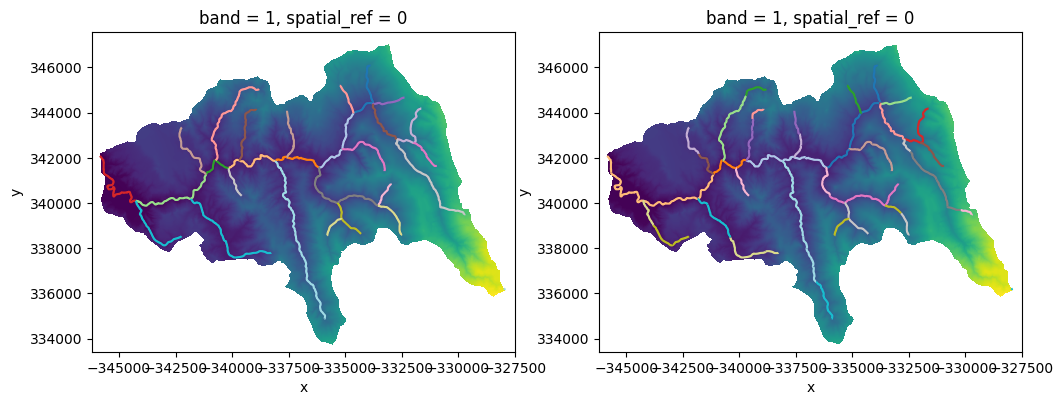

In [5]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
vstreams['color_idx'] = range(len(vstreams))
vreaches['color_idx'] = range(len(vreaches))

dem.plot(ax=axes[0], add_colorbar=False)
vstreams.plot(ax=axes[0], column='color_idx', cmap='tab20', legend=False)
dem.plot(ax=axes[1], add_colorbar=False)
vreaches.plot(ax=axes[1], column='color_idx', cmap='tab20', legend=False)